In [1]:
import pandas as pd

df = pd.read_csv('fish.csv')

In [2]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [3]:
df['Species'].value_counts()

Bream    35
Smelt    14
Name: Species, dtype: int64

In [4]:
df.loc[df['Species']=='Bream','Species'] = 0
df.loc[df['Species']=='Smelt','Species'] = 1

In [5]:
df['Species'] = df['Species'].astype('int32')

In [6]:
df.head()

,Species,Weight,Length
0,0,242.0,25.4
1,0,290.0,26.3
2,0,340.0,26.5
3,0,363.0,29.0
4,0,430.0,29.0


In [7]:
features = df[['Weight','Length']]
outcome = df['Species']

In [8]:
from sklearn.model_selection import train_test_split

train_features, test_featues, train_target, test_target = train_test_split(features,outcome,random_state=42)

In [9]:
train_target.value_counts()

0    25
1    11
Name: Species, dtype: int64

In [10]:
test_target.value_counts()

0    10
1     3
Name: Species, dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [12]:
pred = dt.predict(test_featues)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(accuracy_score(test_target, pred))
print(precision_score(test_target, pred))
print(recall_score(test_target, pred))

1.0
1.0
1.0


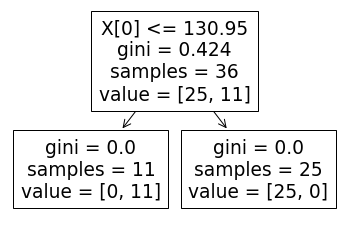

In [14]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt)
plt.show()

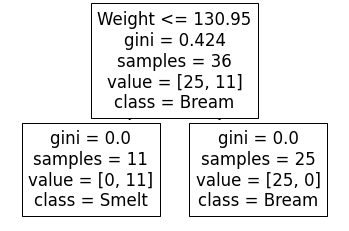

In [15]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt,feature_names=['Weight','Height'],class_names=['Bream','Smelt'])
plt.show()

In [16]:
import pandas as pd

df = pd.read_csv('fish_all.csv')

In [17]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [18]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [19]:
df.loc[df['Species']=='Perch','Species'] = 0
df.loc[df['Species']=='Bream','Species'] = 1
df.loc[df['Species']=='Roach','Species'] = 2
df.loc[df['Species']=='Pike','Species'] = 3
df.loc[df['Species']=='Smelt','Species'] = 4
df.loc[df['Species']=='Parkki','Species'] = 5
df.loc[df['Species']=='Whitefish','Species'] = 6
df['Species'] = df['Species'].astype('int32')

In [20]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


In [21]:
features = df[['Weight','Length1','Length2','Length3','Height','Width']]
outcome = df['Species']

In [22]:
from sklearn.model_selection import train_test_split

train_features, test_featues, train_target, test_target = train_test_split(features,outcome,random_state=42, stratify=outcome)

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [24]:
pred = dt.predict(test_featues)

In [25]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target, pred))

0.775


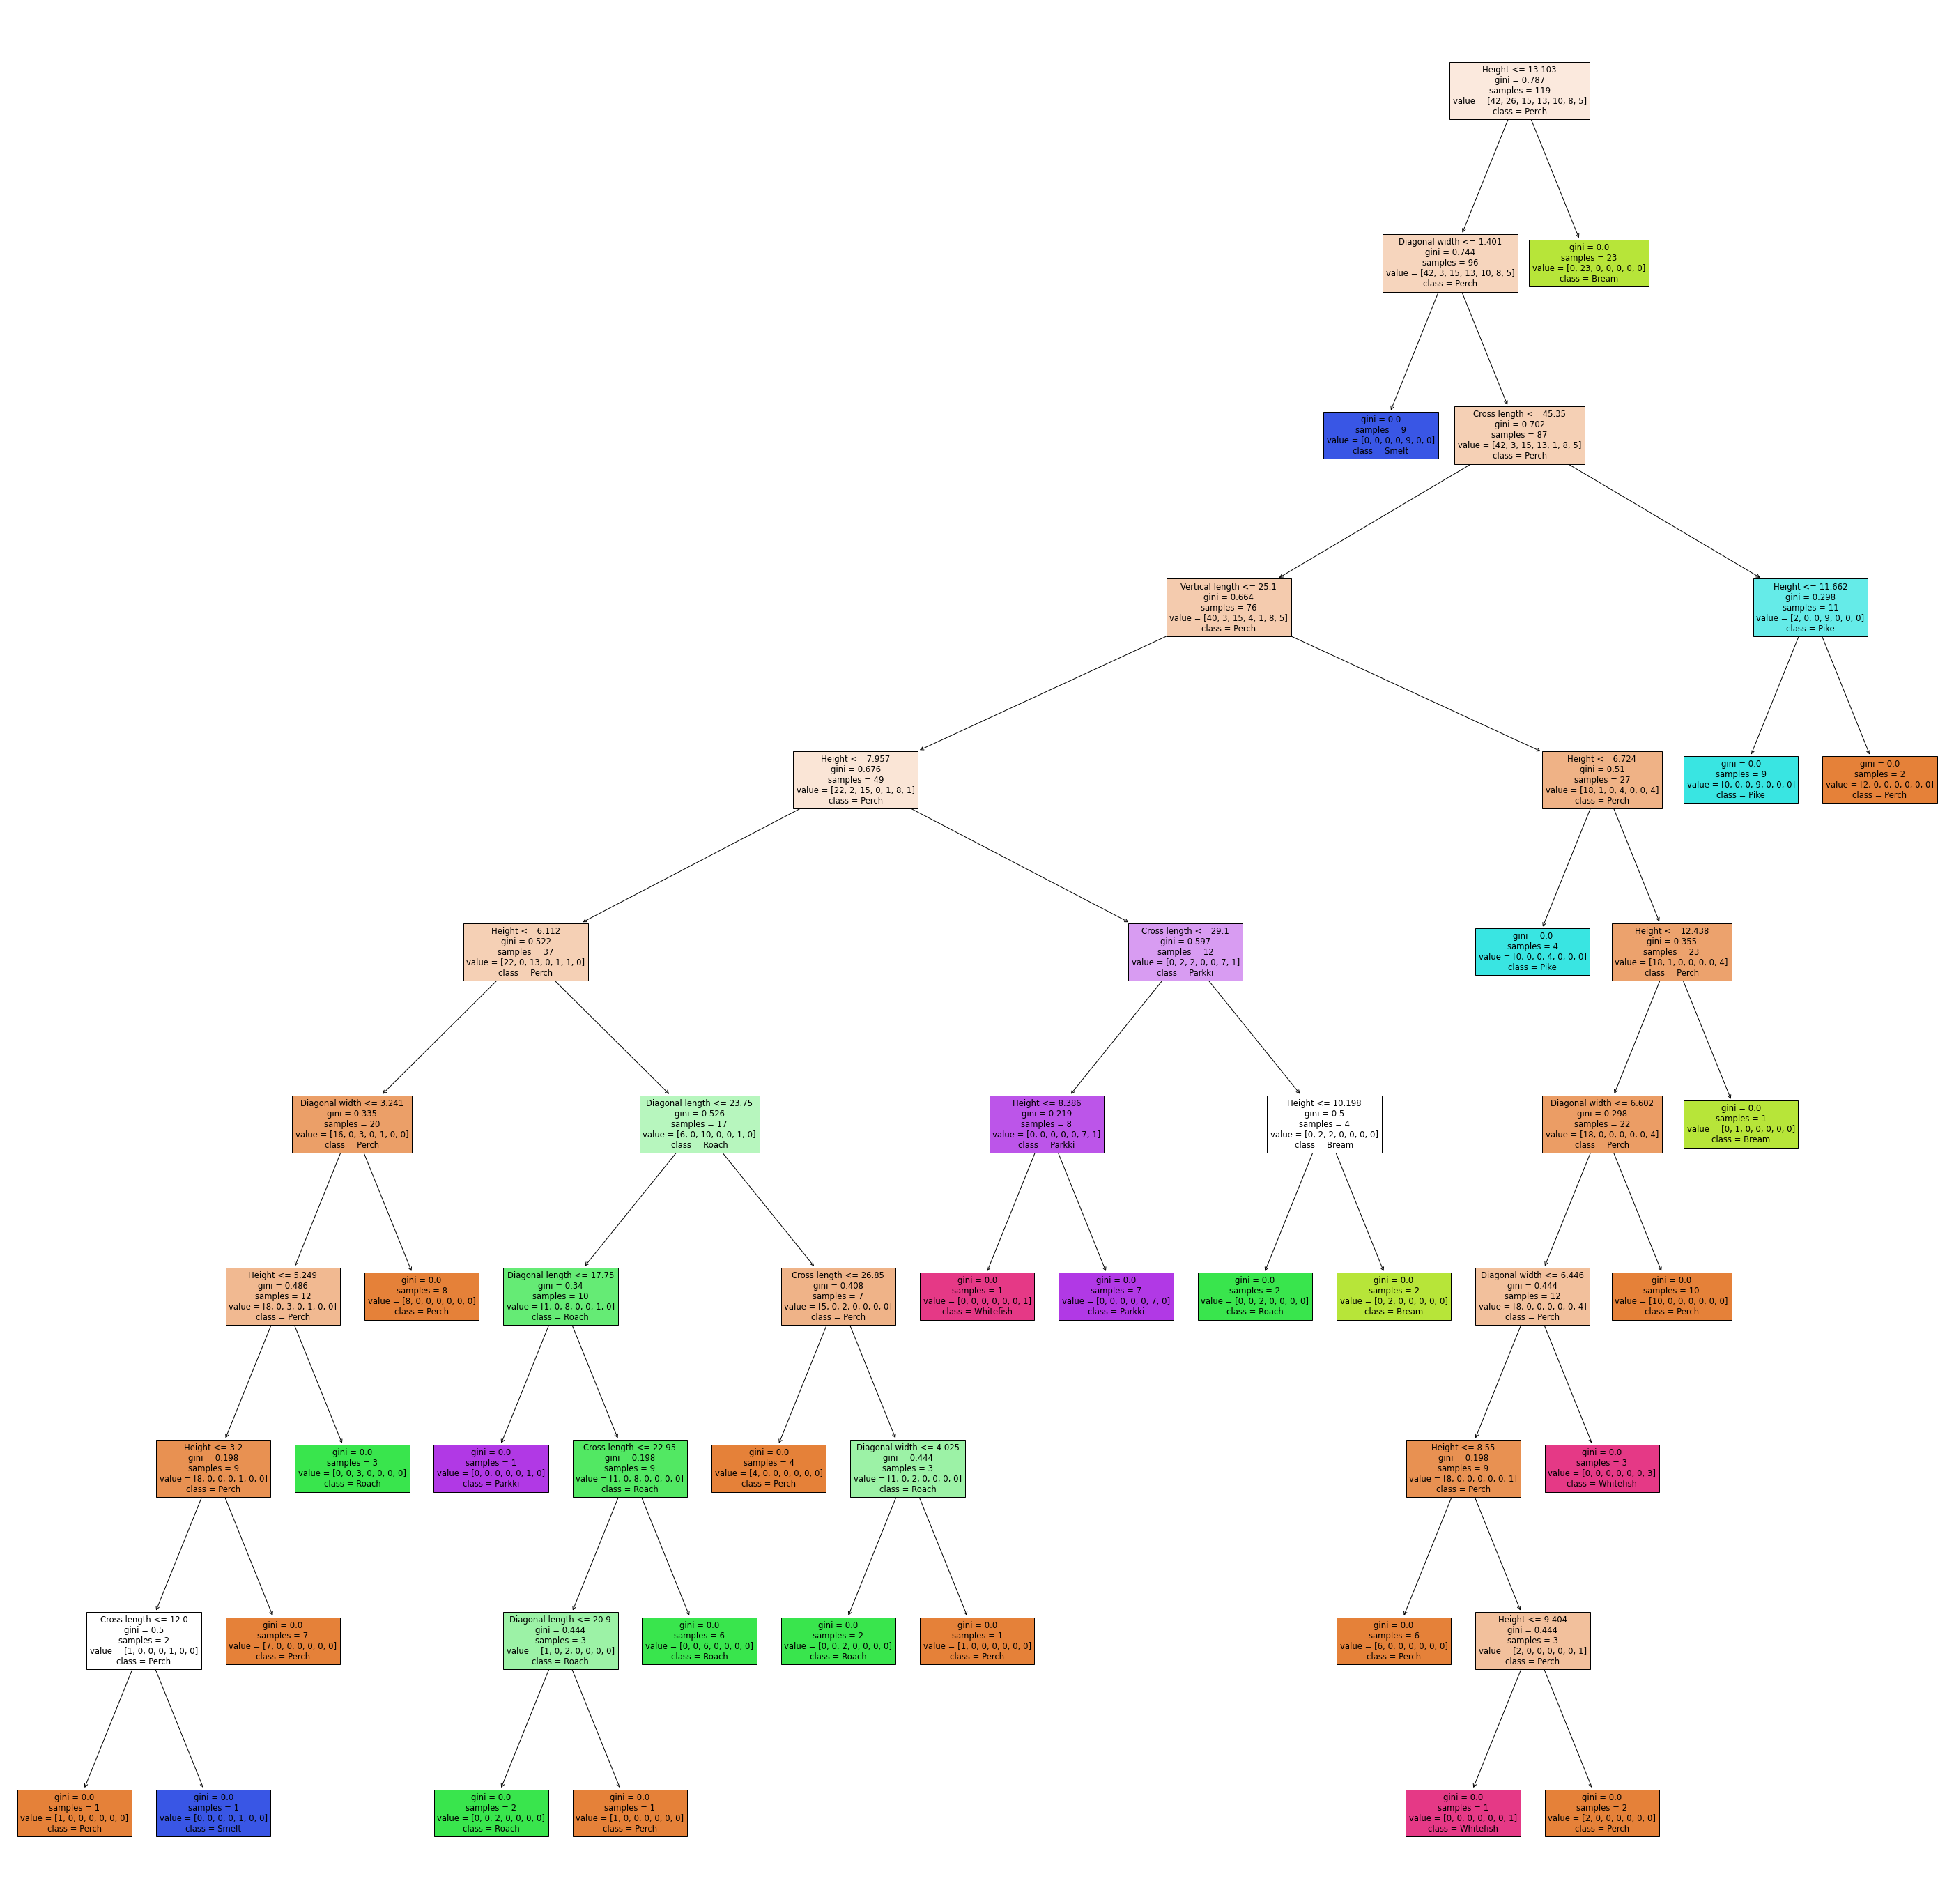

In [26]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(dt,feature_names=['Weight','Vertical length','Diagonal length','Cross length','Height','Diagonal width'],class_names=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],filled = True)
plt.show()

In [27]:
features = df[['Weight','Length1']]
outcome = df['Species']

In [28]:
from sklearn.model_selection import train_test_split

train_features, test_featues, train_target, test_target = train_test_split(features,outcome,random_state=42, stratify=outcome)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

In [30]:
pred = dt.predict(test_featues)

In [31]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_target, pred))

0.725


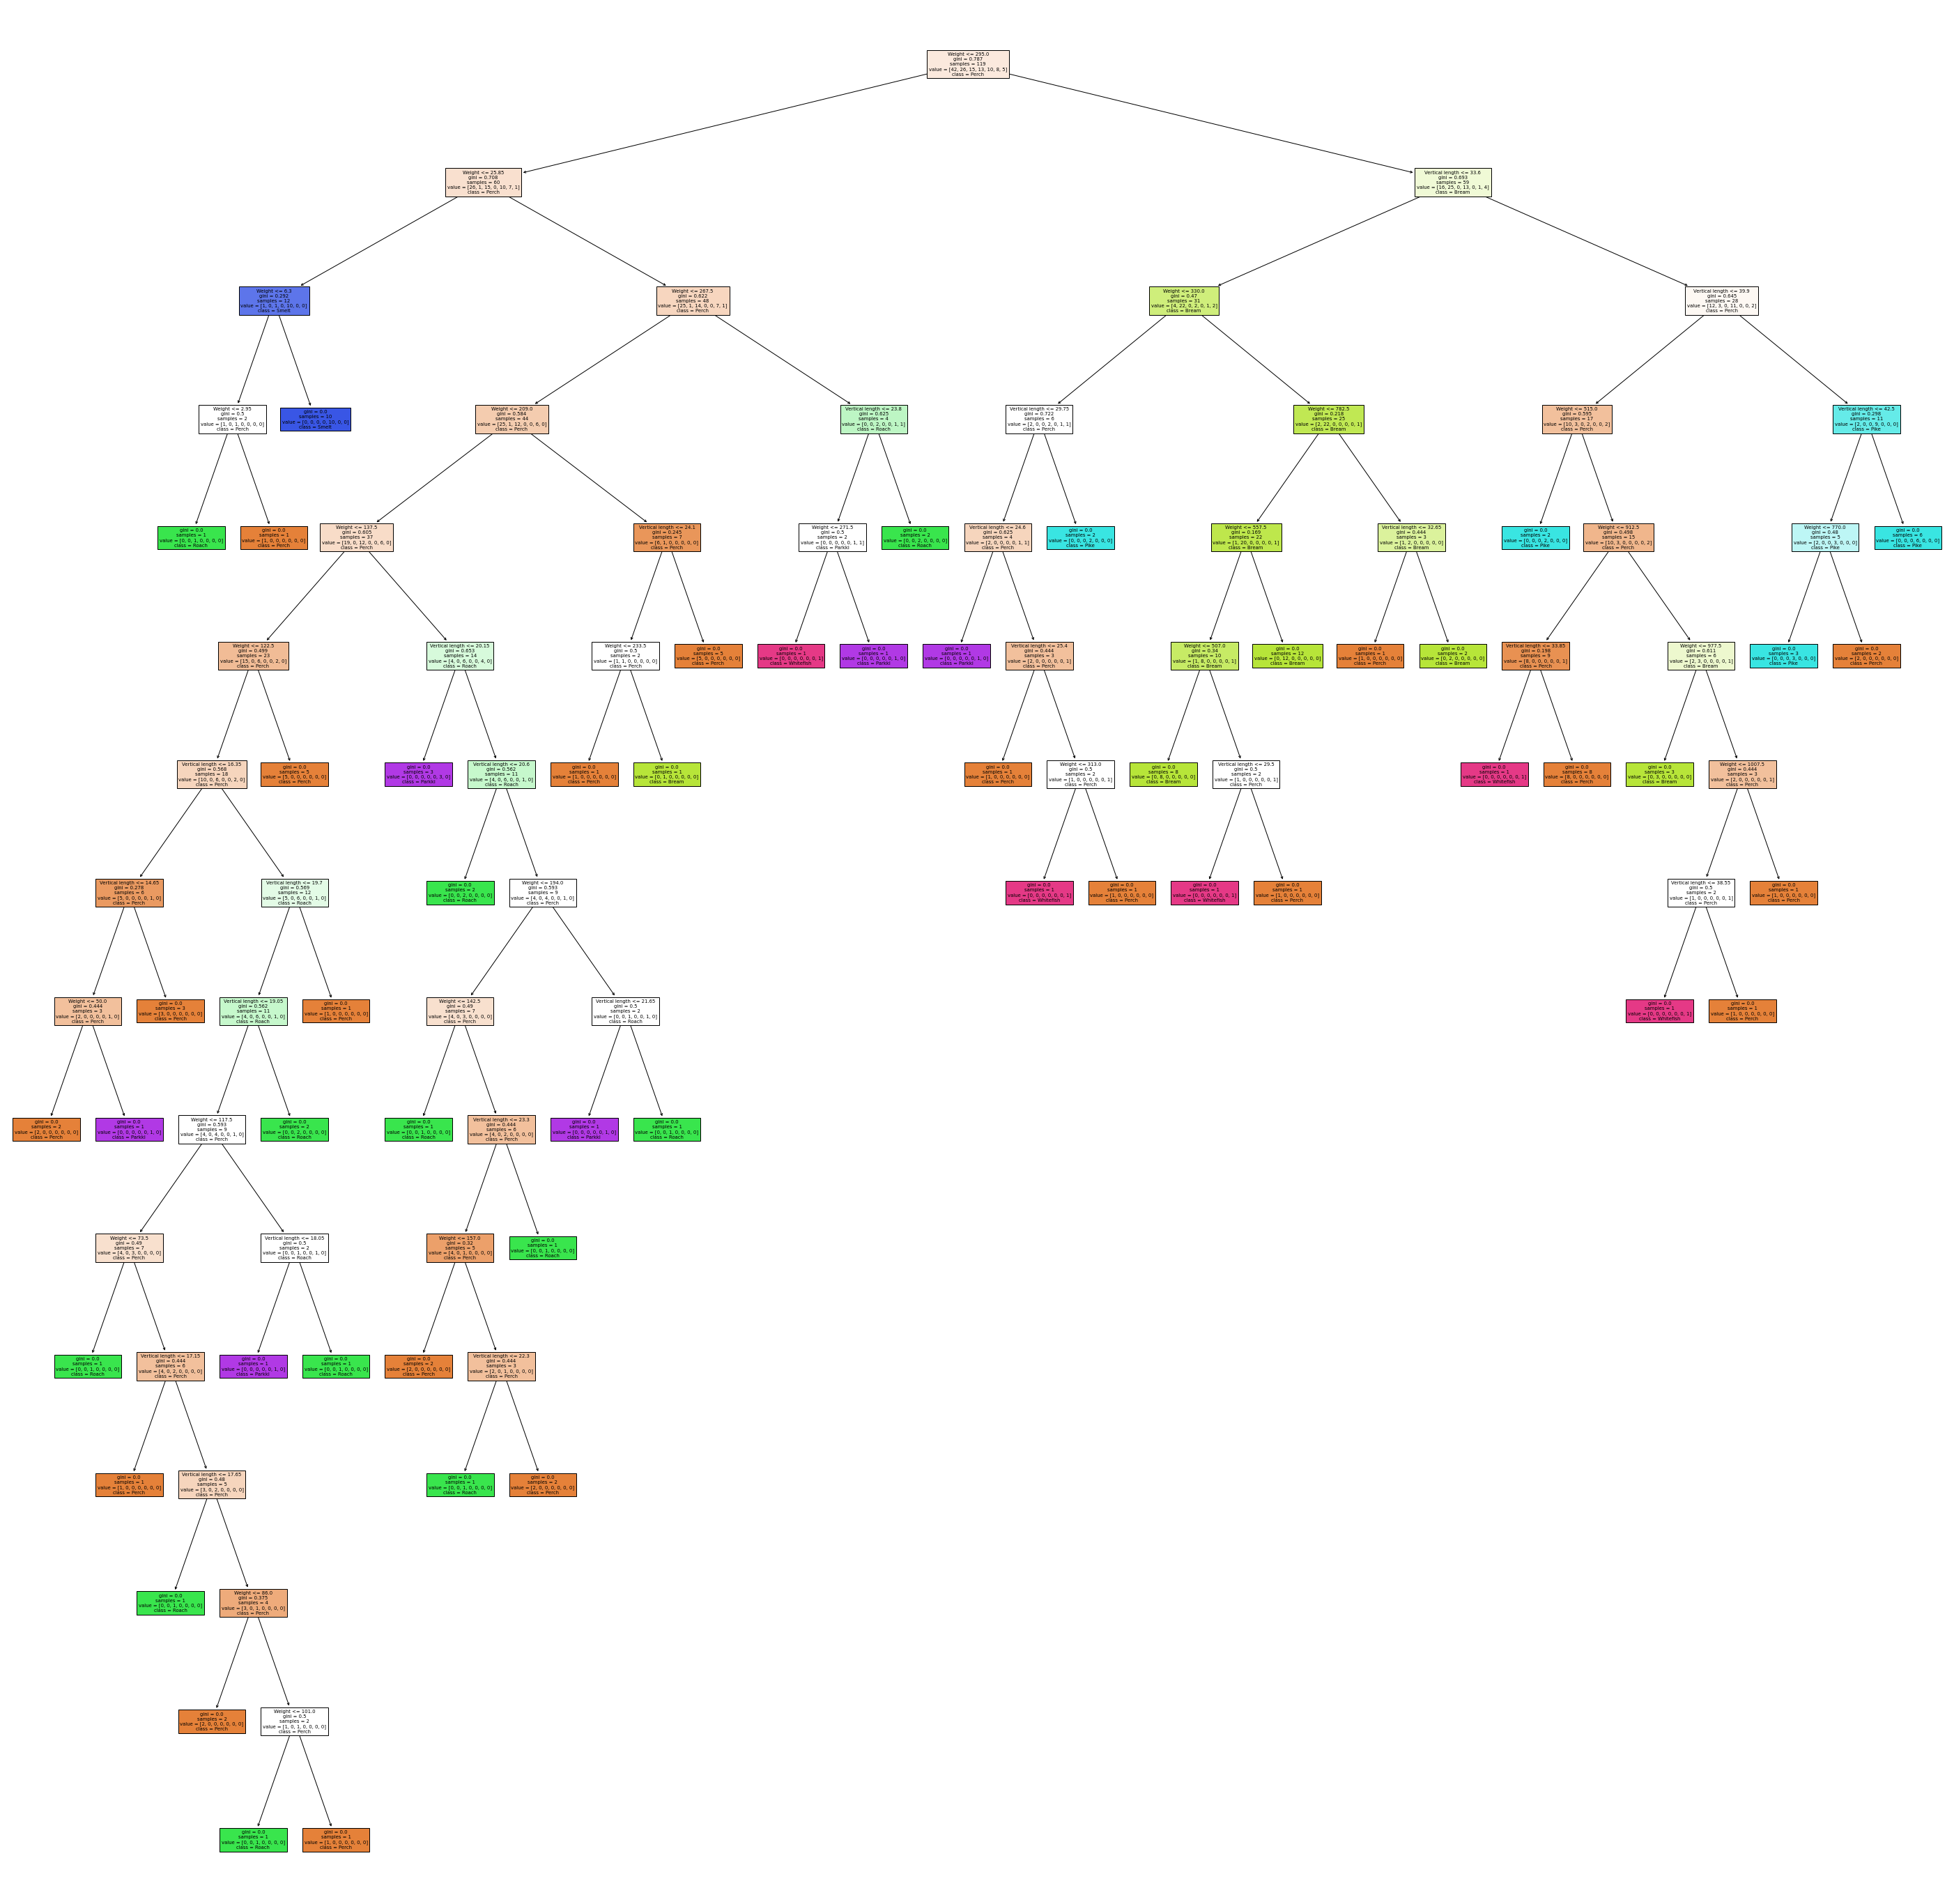

In [32]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(dt,feature_names=['Weight','Vertical length'],class_names=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],filled = True)
plt.show()

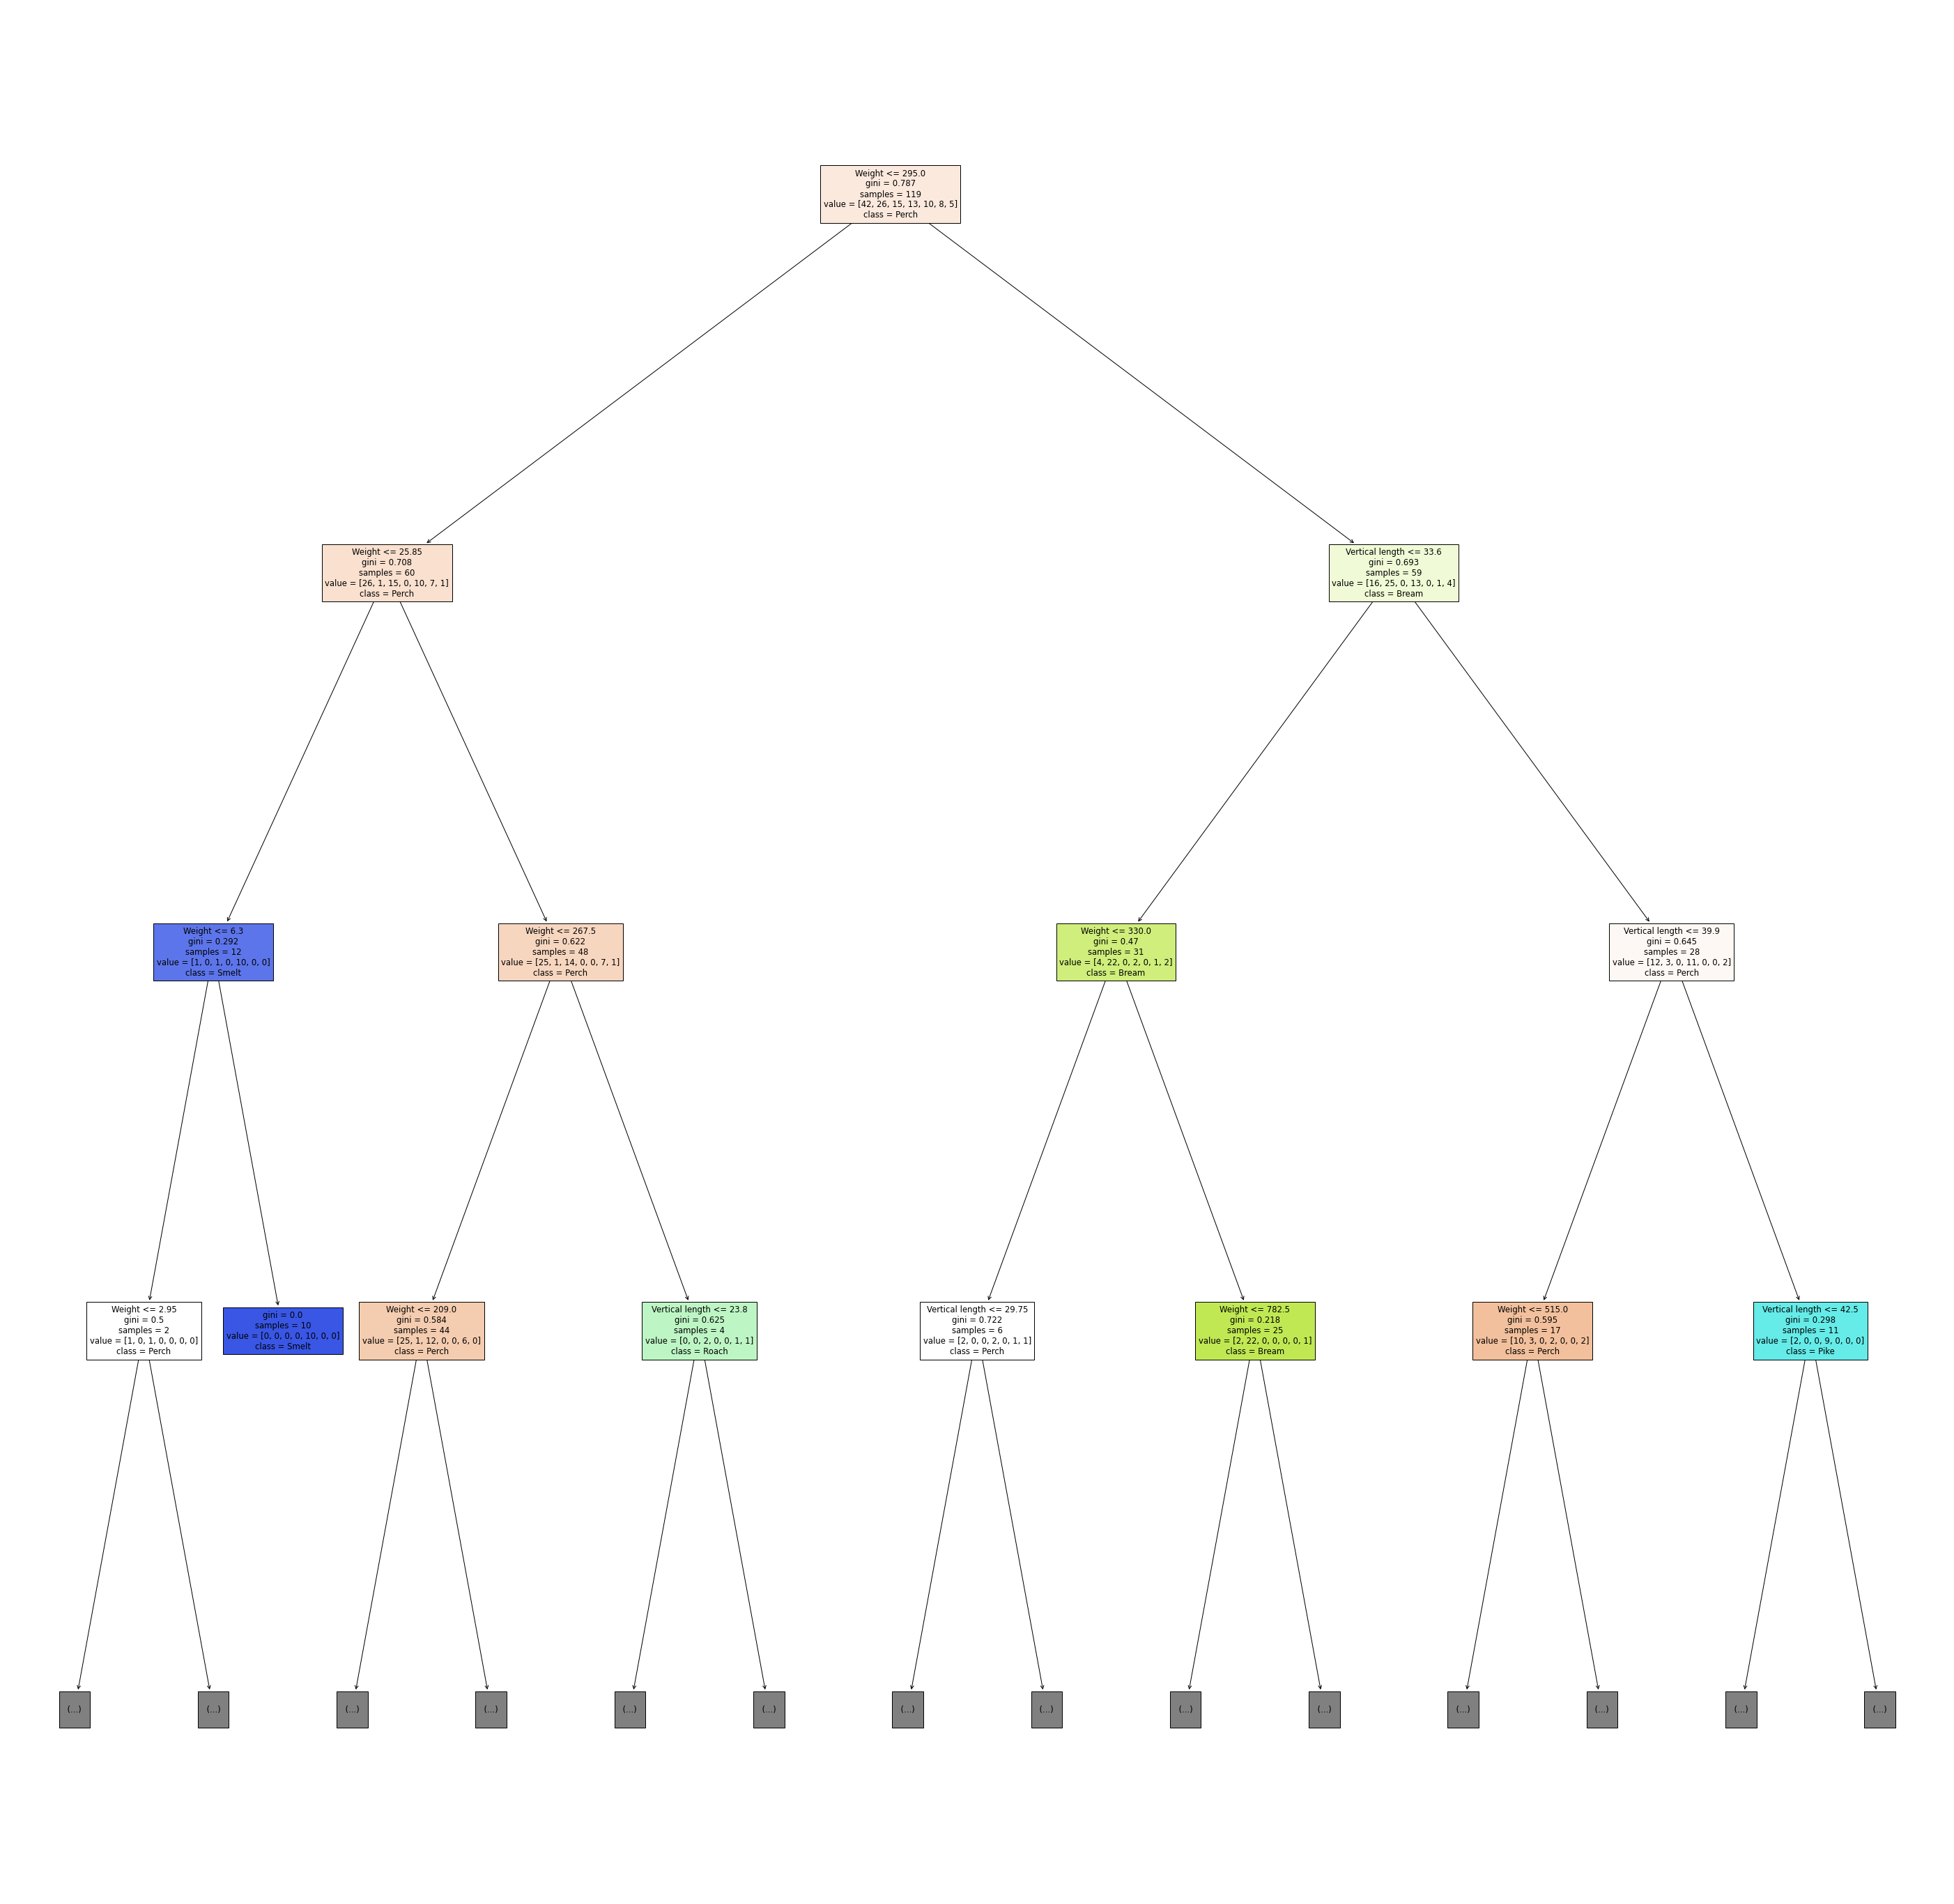

In [33]:
%matplotlib inline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plot_tree(dt,max_depth=3,feature_names=['Weight','Vertical length'],class_names=['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],filled = True)
plt.show()

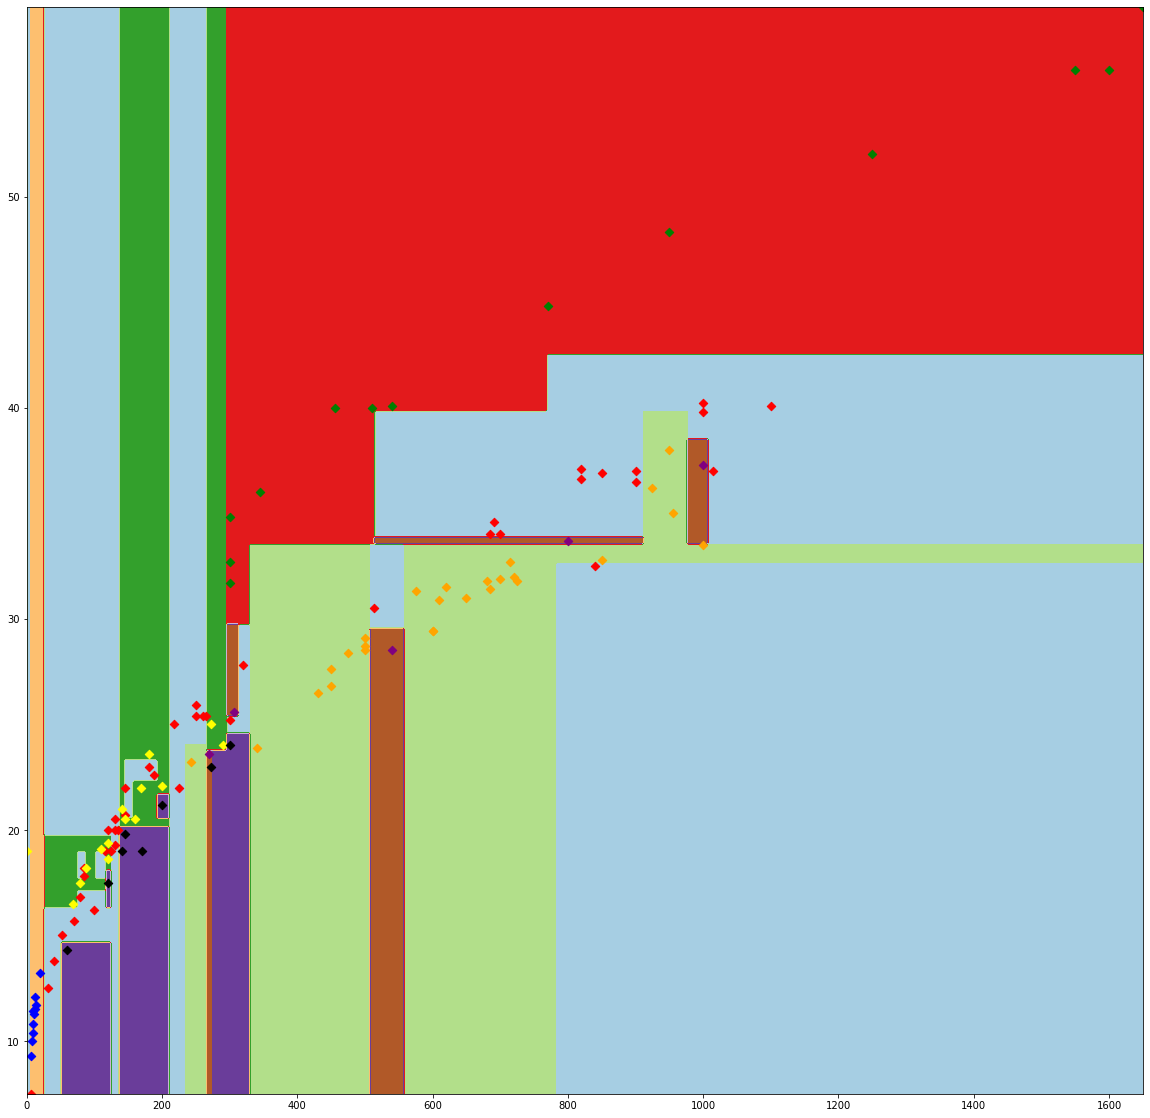

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
color=['red','orange','yellow','green','blue','black','purple']
#      Perch  Bream    Roach    Pike   Smelt   Parkki  Whitefish
plt.figure(figsize=(20,20))
grid_size = 500
x, y = np.meshgrid(np.linspace(features['Weight'].min(), features['Weight'].max(), grid_size),
                   np.linspace(features['Length1'].min(), features['Length1'].max(), grid_size))
c = dt.predict( np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]) ).reshape(grid_size, grid_size)

plt.contourf(x, y, c, cmap='Paired')

for species in sorted(outcome.unique()) :
    feature = train_features.loc[train_target==species,['Weight','Length1']]
    plt.scatter(feature['Weight'],feature['Length1'], marker='D', color=color[species])
plt.show()

In [35]:
import pandas as pd

df = pd.read_csv('fish.csv')

In [36]:
df.loc[df['Species']=='Bream','Species'] = 0
df.loc[df['Species']=='Smelt','Species'] = 1
df['Species'] = df['Species'].astype('int32')

In [37]:
features = df[['Weight','Length']]
outcome = df['Species']

In [38]:
from sklearn.model_selection import train_test_split

train_features, test_featues, train_target, test_target = train_test_split(features,outcome,random_state=42, stratify=outcome)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_features, train_target)

DecisionTreeClassifier(random_state=42)

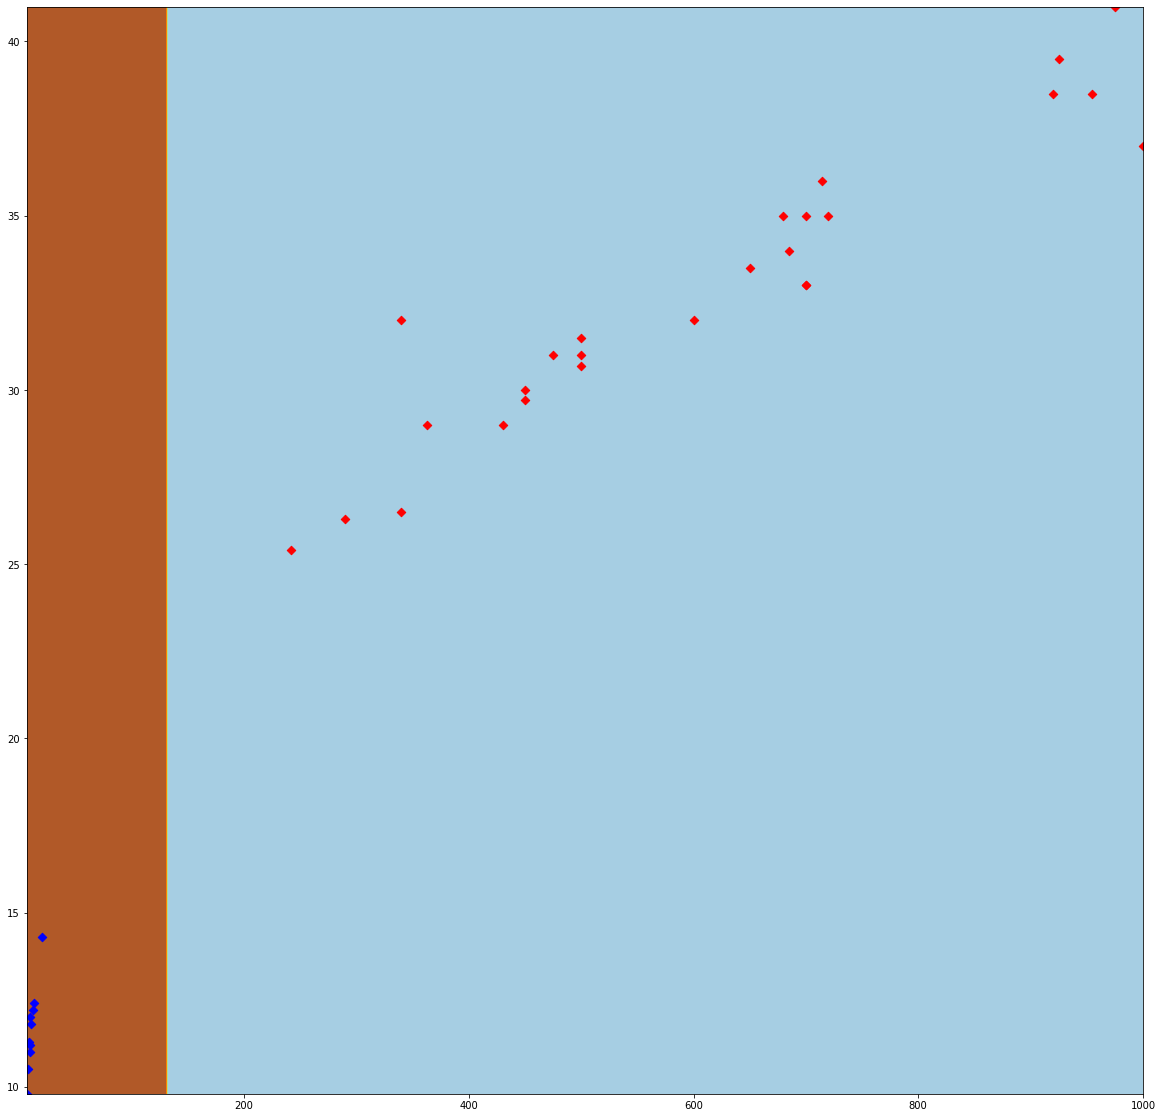

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
color=['red','blue']
#       Bream Smelt

plt.figure(figsize=(20,20))
grid_size = 500
x, y = np.meshgrid(np.linspace(df['Weight'].min(), df['Weight'].max(), grid_size),
                   np.linspace(df['Length'].min(), df['Length'].max(), grid_size))
c = dt.predict( np.hstack([x.reshape(-1, 1), y.reshape(-1, 1)]) ).reshape(grid_size, grid_size)

plt.contourf(x, y, c, cmap='Paired')

for species in sorted(outcome.unique()) :
    feature = train_features.loc[outcome==species,['Weight','Length']]
    plt.scatter(feature['Weight'],feature['Length'], marker='D', color=color[species])
plt.show()